In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [30]:
M, C = 1.2, 0.5
x = 2 * np.pi * np.linspace(0, 3, 1000)

def lin(x, m, c):
    return m * x + c
#

y = lin(x, M, C) + np.random.uniform(low=-3, high=3, size=x.shape[0])

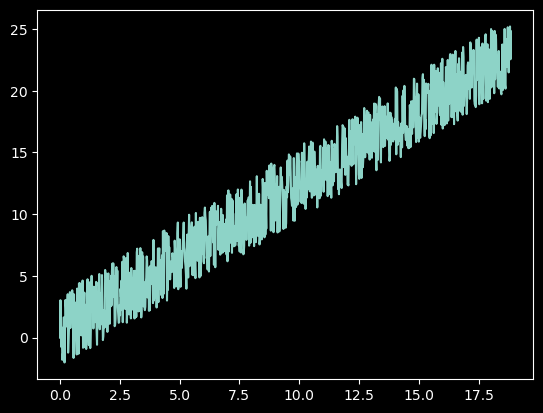

In [31]:
plt.plot(x, y)

# Linear fit
We have data $\{x_i, y_i\}$, and function $y = f(x, m, c) = m x + c$ to fit for optimal $m$ and $c$. We minimize
$$
L(m, c) = \frac 1N\sum_{i}(y_i - f(x_i, m, c))^2 = \frac 1N\sum_{i}(y_i - m x_i - c)^2
$$

In [35]:
p, cov = curve_fit(lin, x, y, method='lm')

In [36]:
p

array([1.18726556, 0.54865619])